In [107]:
import pandas as pd
import numpy as np

In [108]:
start = time.time()
df = pd.read_csv('./amazon_uk_shoes_products_dataset_2021_12.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


In [109]:
df.isnull()
df.isnull().sum()#결측치 확인

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

In [110]:
df.drop_duplicates() # 중복 데이터 제거
df.drop(["helpful_count","uniq_id","scraped_at"], axis = 1, inplace=True) #helpful_count,uniq_id,scraped_at 제거
df = df.dropna(subset=['review_title', 'review_text'])#review_title, review_text의 결측치 제거
df.isnull().sum()#모든 결측치가 사라짐을 확인

url                  0
product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
dtype: int64

In [111]:
print(df["product_name"].value_counts())

product_name
Teva K Hurricane 3, Balboa Sodalite Blue, 12 UK Child                                  10
Think! Men's Kong_585653 Derbys, (Sz/Kombi 09), 6.5 UK                                 10
Reebok Women's Princess Sneaker, White/White/Collegiate Royal, 6 UK                    10
PUMA Men's Axelion Ultra Cross Trainer, Black, Signal red, 10.5 UK                     10
Geox boy J MUNFREY C Low-Top Sneakers, Grey (Grey/Orange C0036), 26                    10
                                                                                       ..
Aldo Women's RPPLFROST1B Sneaker, Light Pink, 6 UK                                      1
Dr. Brinkmann Women’s Flat Platform Size: 6 UK Blue                                     1
adidas Originals Unisex VRX Low Skate Shoe, white/black/white, 4 M US Big Kid           1
Aigle Unisex Adults Brea Botte Iso Wellington Boots, Blue (Marine New 001), 10.5 UK     1
Fila Mindblower Gold Fusion/White-Navy                                                 

In [145]:
#감정분석에 필요한 어휘 ,프로그램을 다운로드
%pip install nltk
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
def normalize_text(text, method='stemming'):# 토큰화
    tokens = nltk.word_tokenize(text.lower())# 불용어 제거
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    if method == 'stemming':# 스테밍
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == 'lemmatization':# 표제어 추출
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# 텍스트 정규화
df['review_text_normalized'] = df['review_text'].apply(lambda x: normalize_text(x, method='stemming'))
#따옴표, 괄호 제거
df.review_text_normalized = df.review_text_normalized.str.strip("[']")
df.review_text_normalized = df.review_text_normalized.str.replace(" ', '", ",", regex = False)
print(df[['review_text_normalized']].head(10))

                                 review_text_normalized
2103  ich habe zwei jacken bestellt , farben limett ...
5328  beim ersten anprobieren waren wir begeistert ....
5773  für die anstehend kalt jahreszeit braucht unse...
5772  für die anstehend kalt jahreszeit braucht unse...
2080  der winter kommt , da weiß ich sicher . wie ic...
2106  die jack ist echt hübsch . weil leut schrieben...
2170  nachdem ich inzwischen bereit divers turnschuh...
5332  wir kaufen schon seit längerer zeit die schuhe...
4378  durch ein große bauch-op `` etwa '' eingeschrä...
959   feder leicht und sehen einfach schick au . die...


In [115]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮
# 리뷰인 경우 감정을 계산.
vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화
def calc_sentiment(review):    
    if review == "No Negative" or review == "No Positive": 
    return vader_sentiment.polarity_scores(review)["compound"]  
# 리뷰가 텍스트입니다. 따라서 VADER 감정 분석기를 사용하여 감정 점수(컴파운드 스코어)를 계산하고 반환

In [116]:
print("Calculating sentiment columns for review_text")#review_text에 대한 감정 계산
start = time.time()
df["review_text_Sentiment"] = df.review_text.apply(calc_sentiment)#review_text에 대한 감정 계산 시간 측정
end = time.time()
print("Calculating sentiment took " + str(round(end - start, 2)) + " seconds")
#감정 계산에 0.25초 소요

Calculating sentiment columns for review_text
Calculating sentiment took 2.32 seconds


In [117]:
# 결과가 감정이 리뷰와 일치하는지 확인합니다.
df = df.sort_values(by=["review_text_Sentiment"], ascending=True)
print(df[["review_text_Sentiment"]])
#-1에 가까울수록 부정적인 감정을 나타냅니다.
#1에 가까울수록 긍정적인 감정을 나타냅니다.

      review_text_Sentiment
2103                -0.9955
5328                -0.9930
5773                -0.9917
5772                -0.9917
2080                -0.9914
...                     ...
5427                 0.9949
5197                 0.9956
1335                 0.9963
3298                 0.9964
5041                 0.9971

[6813 rows x 1 columns]


In [119]:
print("The shape of the data (rows, cols) is " + str(df.shape))

The shape of the data (rows, cols) is (6813, 9)


In [120]:
#신발은 몇종류가 있는가? --> 1086
shoes_freq = df["product_name"].value_counts()
print("There are " + str(shoes_freq.size) + " shoes")
print(shoes_freq) 

There are 1086 shoes
product_name
BMS Raincoat 100% Waterproof - Red with White Dots - 40L - Long Arms                                              10
Cole Haan Women's Grand Crosscourt Turf Sneaker, Optic White Leather, 7.5 UK                                      10
Reebok Kids Royal Cljog 2 Sneaker                                                                                 10
Element Men's Passiph Shoe Sneaker, Ceylon Yellow, 11 UK                                                          10
JENN ARDOR Womens Slip On Sneakers Perforated Flats Comfortable Walking Fashion Tennis Shoes Camo Size: 4.5 UK    10
                                                                                                                  ..
GANT Women's Raffiaville Sneaker, Off White, 3.5 UK                                                                1
GANT Women's Nicewill Sneaker, White, 7 UK                                                                         1
Bisgaard Unisex Kids fred Mid 

In [121]:
#5점을 받은 신발은 어느것이 있는가?
rating_5 = df[df['review_rating'] == 5.0]
num_5=len(rating_5)
print(num_5)

4250


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [45]:
%pip install scikit-learn
%pip install matplotlib
%pip install pandas
%pip install datetime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [166]:
from sklearn.model_selection import train_test_split, GridSearchCV

#리뷰 평점에서 4이상 = 긍정적, 4이하(1,2,3) = 부정적
df['sentiment'] = df['review_rating'].apply(lambda x: 1 if x >= 4 else 0)

# x값, y값 설정
x = df['review_text']
y = df['sentiment']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)model

# 학습 데이터와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import randint
param_dist = {
    'max_depth': randint(1, 11),  #최적의 깊이
    'n_estimators': randint(10, 201)  #최적의 트리 개수
}

# 모델 설정
rf = RandomForestClassifier()

# Random Search 수행
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(X_train, y_train)

# 최적의 파라미터와 점수 출력
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
#최적의 깊이: 7
#최적의 트리 개수: 91
#랜덤 서치 결과 점수는 0.7572

Best Parameters:  {'max_depth': 7, 'n_estimators': 91}
Best Score:  0.7572477064220184


In [178]:
from sklearn.model_selection import cross_val_score
best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.75779817 0.75779817 0.75688073 0.75688073 0.75688073]
Mean cross-validation score: 0.7572


In [85]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [57]:
# 예측 모델 설정
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [60]:
# 모델평가(정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

In [91]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
#정확도: 0.8158
#정밀도: 0.8160
#재현율: 0.6525
#F1 점수: 0.8886
#ROC-AUC: 0.8978

Accuracy: 0.8158
Precision: 0.8160
Recall: 0.6525
F1 Score: 0.8886
ROC-AUC: 0.8978


/tmp/ipykernel_1775/3506467303.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='Score', data=df_models, palette='viridis')


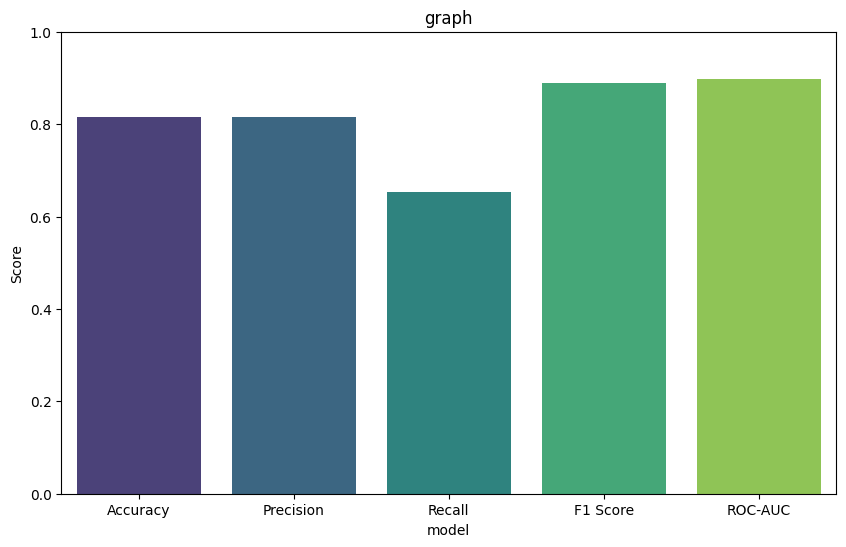

In [180]:
import matplotlib.pyplot as plt
models = {
    'model': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
}
df_models = pd.DataFrame(models)

# 평가 지표 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='Score', data=df_models, palette='viridis')
plt.ylim(0, 1)
plt.title('graph')
plt.ylabel('Score')
plt.show()

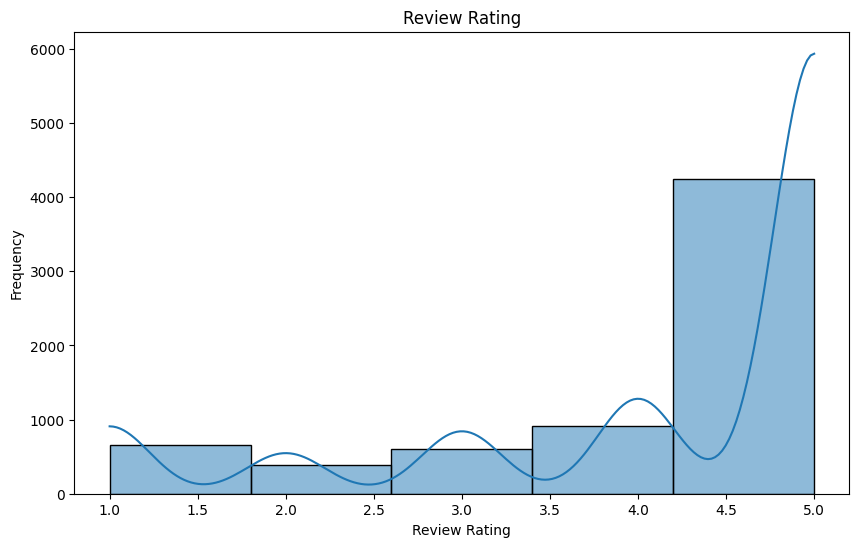

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['review_rating'], bins=5, kde=True)
plt.title('Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

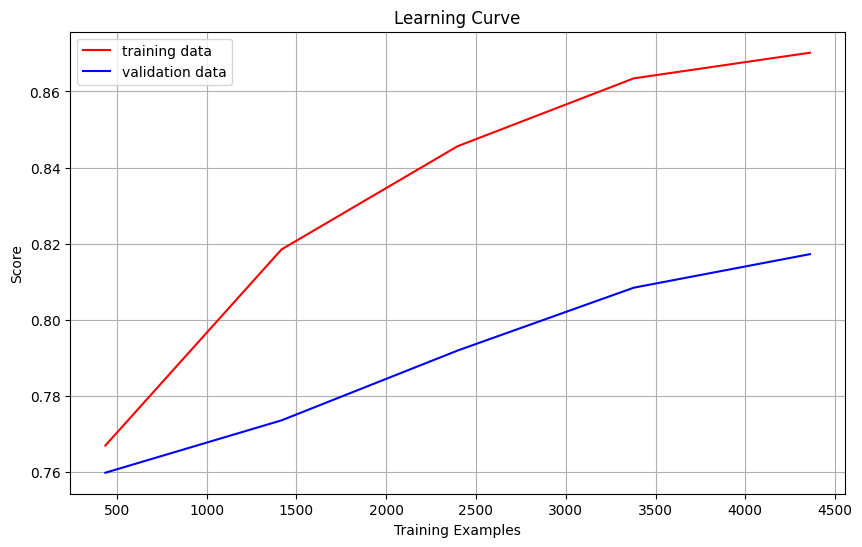

In [90]:
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

# 정확도(Accuracy)를 이용한 학습곡선
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), color='red',label='training data')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), color='blue', label='validation data')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#오버피팅: 모델이 학습 데이터에 너무 잘 맞춰져서 새로운 데이터에 대한 일반화 성능이 떨어지는 현상.
#언더피팅: 모델이 학습 데이터의 패턴을 충분히 학습하지 못하는 현상.
#학습데이터의 점수가 검증데이터의 점수보다 높은 오버피팅 그래프입니다.
#학습데이터의 성능은 높지만 검증 데이터나 새로운 데이터에서 성능이 떨어질 수 있습니다.

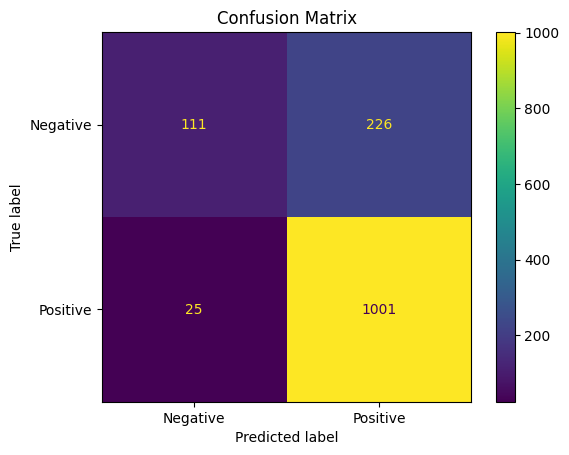

In [71]:
# 혼동 행렬 생성 및 시각화
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()
#모델이 긍정적이라고 예측한 리뷰중 긍정적 리뷰 1001
#모델이 부정적이라고 예측한 리뷰중 부정적 리뷰 111
#모델이 긍정적이라고 예측한 리뷰중 부정적 리뷰 226
#모델이 부정적이라고 예측한 리뷰중 긍정적 리뷰 25

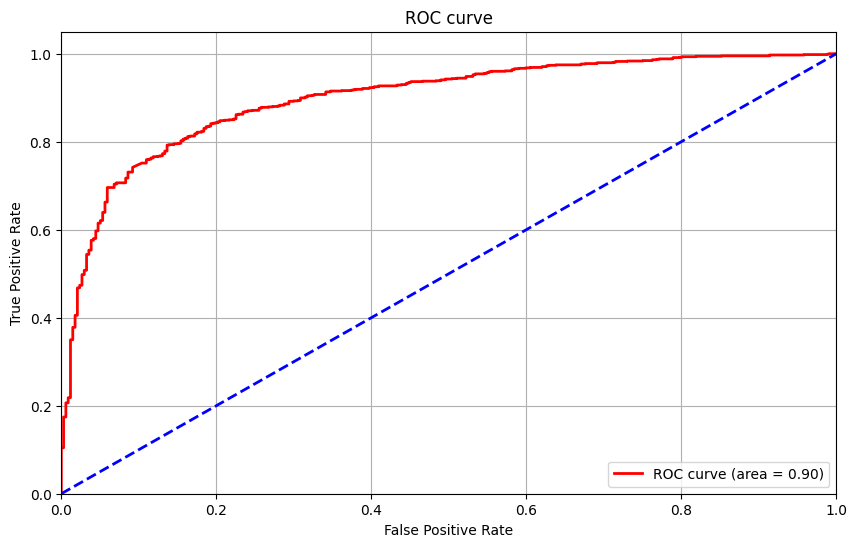

In [76]:
# ROC 곡선 생성
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

# ROC 곡선 그래
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
#ROC 곡선이 왼쪽 위에 가까울수록 모델의 분류 성능이 좋다.
#ROC 곡선이 대각선 위에 있으면 모델이 무작위 예측보다 성능이 좋다는 것을 의미
#ROC-AUC 값이 0.90으로 상당히 좋은 분류 성능

In [ ]:
#정확도: 0.8158
#정밀도: 0.8160
#재현율: 0.6525
#F1 점수: 0.8886
#ROC-AUC: 0.8978
#대부분의 평가가 높은 수준으로 나타났지만 재현율이 다른 평가와 비교해서 살짝 낮은 수치입니다.
#혼동 행렬 그래프가 정상적으로 출력되었습니다.
#AUC 곡선 그래프 생성 결과 AUC의 값이 0.9로 성능 평가에서 긍정적인 결과를 확인했습니다.
#모델 평가 결과 대부분의 수치에서 80% 이상의 수치가 측정되었기 때문에 분석 시스템의 성능이 긍정적이라고 말할 수 있습니다.